In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
from sklearn.metrics import roc_curve

- For each model I need:
    * **[optional]** corss validation results -> different scores
    * confusion matrix
    * precision recall curve
    * ROC AUC curve

In [2]:
# TODO: read models from file -> dc
# TODO: read training data from file -> X_train, y_train
df = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])
y_train = train_df["churn"]
y_test = test_df["churn"]

In [3]:
# cross_val_results is a dataframe with mean and sd of CV scores

In [4]:
%%capture --no-display

classification_metrics = ["accuracy", "precision", "recall", "f1"]

# The dummy model
dc_0 = DummyClassifier()
dc_0.fit(X_train, y_train)
dc_1 = DummyClassifier()
dc_1.fit(X_train, y_train)
dc_2 = DummyClassifier()
dc_2.fit(X_train, y_train)
dc_3 = DummyClassifier()
dc_3.fit(X_train, y_train)

# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results = {}

cross_val_results['dummy_0'] = pd.DataFrame(
    cross_validate(dc_0, X_train, y_train, return_train_score=True, scoring=classification_metrics)
).agg(['mean', 'std']).round(3).T

cross_val_results['dummy_1'] = pd.DataFrame(
    cross_validate(dc_1, X_train, y_train, return_train_score=True, scoring=classification_metrics)
).agg(['mean', 'std']).round(3).T

cross_val_results['dummy_2'] = pd.DataFrame(
    cross_validate(dc_2, X_train, y_train, return_train_score=True, scoring=classification_metrics)
).agg(['mean', 'std']).round(3).T

cross_val_results['dummy_3'] = pd.DataFrame(
    cross_validate(dc_3, X_train, y_train, return_train_score=True, scoring=classification_metrics)
).agg(['mean', 'std']).round(3).T

In [5]:
# Compare the average scores of all the models
pd.concat(
    cross_val_results,
    axis='columns'
).xs(
    'mean',
    axis='columns',
    level=1
).style.format(
    precision=2
).background_gradient(
    axis=None
)

,dummy_0,dummy_1,dummy_2,dummy_3
fit_time,0.00,0.00,0.00,0.00
score_time,0.01,0.01,0.01,0.01
test_accuracy,0.85,0.85,0.85,0.85
train_accuracy,0.85,0.85,0.85,0.85
test_precision,0.00,0.00,0.00,0.00
train_precision,0.00,0.00,0.00,0.00
test_recall,0.00,0.00,0.00,0.00
train_recall,0.00,0.00,0.00,0.00
test_f1,0.00,0.00,0.00,0.00
train_f1,0.00,0.00,0.00,0.00


In [6]:
# Sanity check that the cross val std doesn't look way off for some model
pd.concat(
    cross_val_results,
    axis='columns'  # Get the right model names and mean/std as columns
).xs(
    'std',  # Select only the 'std' columns
    axis='columns',  # Cross-section the columns
    level=1  # The 1st level ('mean', 'std') instead of the 0th level (the model names)
).style.format(
    precision=2  # Pandas `.style` does not honor previous rounding via `.round()`
).background_gradient(
    axis=None  # Color cells based on the entire matrix rather than row/column-wise
)

,dummy_0,dummy_1,dummy_2,dummy_3
fit_time,0.01,0.00,0.00,0.00
score_time,0.01,0.00,0.00,0.00
test_accuracy,0.00,0.00,0.00,0.00
train_accuracy,0.00,0.00,0.00,0.00
test_precision,0.00,0.00,0.00,0.00
train_precision,0.00,0.00,0.00,0.00
test_recall,0.00,0.00,0.00,0.00
train_recall,0.00,0.00,0.00,0.00
test_f1,0.00,0.00,0.00,0.00
train_f1,0.00,0.00,0.00,0.00


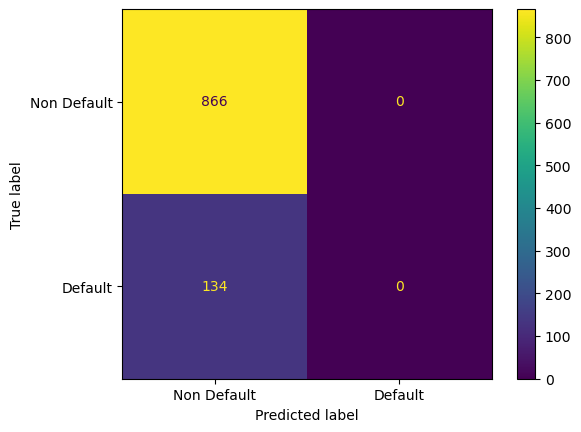

In [7]:
confusion_matrix_dc_0 = confusion_matrix(y_test, dc_0.predict(X_test))
ConfusionMatrixDisplay(
    confusion_matrix_dc_0, display_labels=["Non Default", "Default"]
).plot()

/home/ken/miniconda3/envs/522/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


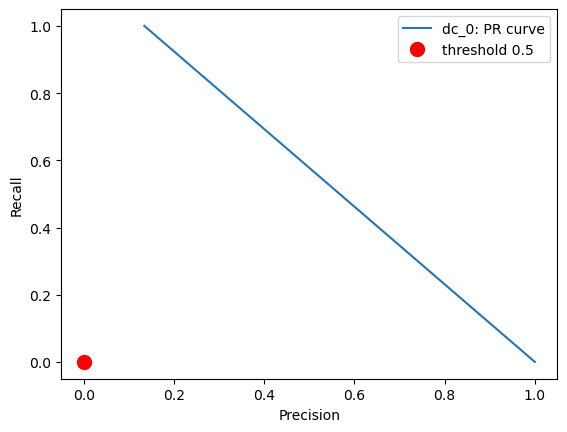

In [8]:
precision, recall, thresholds = precision_recall_curve(
    y_test, dc_0.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="dc_0: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, dc_0.predict(X_test)),
    recall_score(y_test, dc_0.predict(X_test)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

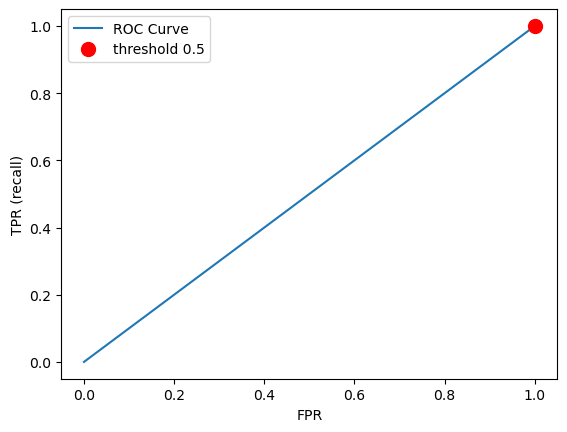

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, dc_0.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");